In [9]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import scipy

sys.path.insert(0, os.path.abspath('../src'))
# sys.path.insert(0, os.path.abspath('src')) caso esteja no diretório raiz


from preprocessing.fourier import apply_fft, get_dominant_frequencies, apply_stft_with_hamming
from mapping.color_mapper import frequency_to_color_physical

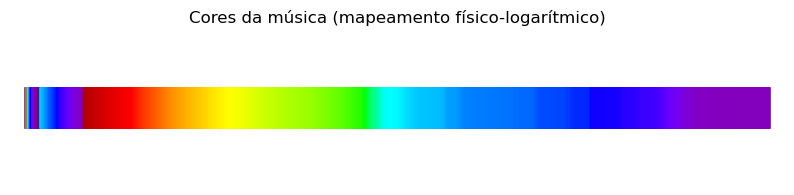

In [11]:
#SEM WINDOWING

# 1. Carregue o áudio
signal, fs = librosa.load(
    "../data/raw/797705__erokia__ub-e-67-128-bpm.wav", sr=44100)

# 2. FFT
freqs, mags = apply_fft(signal, fs)

# 3. Frequências dominantes
dominants = get_dominant_frequencies(freqs, mags, threshold=0.01)

colors = frequency_to_color_physical(dominants)

# 5. Visualizar as cores
plt.figure(figsize=(10, 2))
for i, color in enumerate(colors[:len(colors)]):  # Mostra até 100 cores
    plt.plot([i, i+1], [0, 0], linewidth=30, color=tuple(c/255 for c in color))
plt.title("Cores da música (mapeamento físico-logarítmico)")
plt.axis('off')
plt.show()

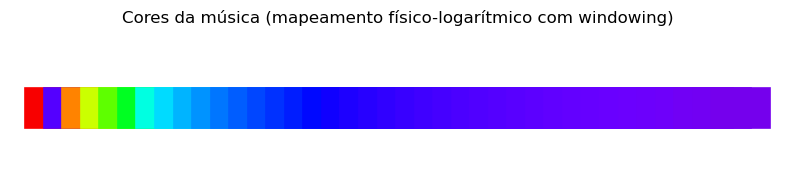

In [10]:
#  COM WINDOWING


# 1. Carregue o áudio
signal, fs = librosa.load(
    "../data/raw/797705__erokia__ub-e-67-128-bpm.wav", sr=44100)

# 2. FFT
freqs, mags_matrix = apply_stft_with_hamming(signal, fs)

# 3. Frequências dominantes
avg_mags = np.mean(mags_matrix, axis=1)
dominants = get_dominant_frequencies(freqs, avg_mags, threshold=0.01)

colors = frequency_to_color_physical(dominants)

# 5. Visualizar as cores
plt.figure(figsize=(10, 2))
for i, color in enumerate(colors[:len(colors)-1]): 
    plt.plot([i, i+1], [0, 0], linewidth=30, color=tuple(c/255 for c in color))
plt.title("Cores da música (mapeamento físico-logarítmico com windowing)")
plt.axis('off')
plt.show()

In [23]:
print(dominants)

len(dominants)

[34.79018762677485, 34.79969574036512, 34.806034482758626, 34.80920385395538, 34.83455882352941, 34.84723630831643, 34.85040567951319, 34.86625253549696, 34.87259127789047, 34.87893002028398, 34.882099391480736, 34.894776876267755, 34.92330121703854, 34.95499492900609, 34.977180527383375, 35.01204361054767, 35.034229208924955, 35.040567951318465, 35.04373732251522, 35.05641480730223, 35.05958417849899, 35.06275354969574, 35.0659229208925, 35.06909229208925, 35.07226166328601, 35.07543103448276, 35.078600405679516, 35.08176977687627, 35.084939148073026, 35.08810851926978, 35.09444726166329, 35.097616632860046, 35.1007860040568, 35.1356490872211, 35.154665314401626, 35.161004056795136, 35.167342799188646, 35.1705121703854, 35.17685091277891, 35.18318965517242, 35.18952839756593, 35.192697768762685, 35.199036511156194, 35.2053752535497, 35.218052738336716, 35.22122210953347, 35.22756085192698, 35.230730223123736, 35.23389959432049, 35.237068965517246, 35.24657707910751, 35.249746450304265

10707

In [24]:

print(colors)

len(colors)


((131, 0, 190), (131, 0, 190), (131, 0, 189), (131, 0, 189), (131, 0, 188), (131, 0, 187), (131, 0, 187), (131, 0, 187), (131, 0, 186), (131, 0, 186), (131, 0, 186), (131, 0, 185), (131, 0, 184), (131, 0, 183), (131, 0, 182), (131, 0, 180), (131, 0, 179), (131, 0, 179), (130, 0, 179), (130, 0, 178), (130, 0, 178), (130, 0, 178), (130, 0, 178), (130, 0, 178), (130, 0, 177), (130, 0, 177), (130, 0, 177), (130, 0, 177), (130, 0, 177), (130, 0, 177), (130, 0, 176), (130, 0, 176), (130, 0, 176), (130, 0, 175), (130, 0, 174), (130, 0, 174), (130, 0, 173), (130, 0, 173), (130, 0, 173), (130, 0, 173), (130, 0, 172), (130, 0, 172), (130, 0, 172), (130, 0, 172), (130, 0, 171), (130, 0, 171), (130, 0, 171), (130, 0, 170), (130, 0, 170), (130, 0, 170), (130, 0, 170), (129, 0, 170), (129, 0, 169), (129, 0, 169), (129, 0, 169), (129, 0, 169), (129, 0, 167), (129, 0, 167), (129, 0, 167), (129, 0, 167), (129, 0, 167), (129, 0, 166), (129, 0, 166), (129, 0, 166), (129, 0, 165), (129, 0, 165), (129, 0, 

10707

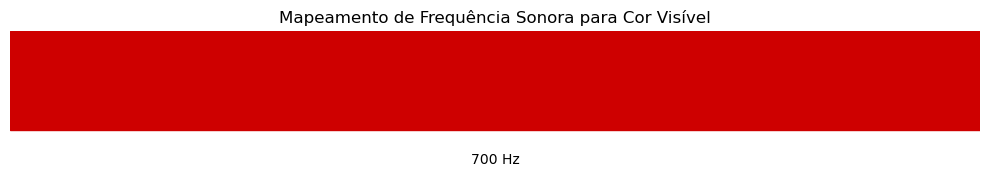

In [61]:
import matplotlib.pyplot as plt
import numpy as np


def frequency_to_wavelength(frequency_hz):
    """Converte frequência sonora (20 Hz a 20.000 Hz) para comprimento de onda visível (700 a 400 nm)"""
    return 700 - ((frequency_hz - 20) / (20000 - 20)) * 300


def wavelength_to_rgb(wavelength):
    """Converte comprimento de onda (400 a 700 nm) para RGB aproximado"""
    gamma = 0.8
    intensity_max = 255

    if 380 <= wavelength < 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 <= wavelength < 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif 490 <= wavelength < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif 510 <= wavelength < 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 <= wavelength < 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif 645 <= wavelength <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = G = B = 0.0

    # Ajuste de intensidade nas bordas do espectro
    if 380 <= wavelength < 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 420 <= wavelength < 645:
        factor = 1.0
    elif 645 <= wavelength <= 780:
        factor = 0.3 + 0.7 * (780 - wavelength) / (780 - 645)
    else:
        factor = 0.0

    R = round(intensity_max * (R * factor) ** gamma)
    G = round(intensity_max * (G * factor) ** gamma)
    B = round(intensity_max * (B * factor) ** gamma)

    return (R, G, B)


# Frequências de exemplo
frequencies = [20, 600, 700,800,900, 1000, 4500,4700,5000,5500,6000, 10000, 15000, 18000, 19000,20000]
wavelengths = [frequency_to_wavelength(f) for f in frequencies]
colors = [wavelength_to_rgb(w) for w in wavelengths]

# Exibir os resultados visualmente
fig, ax = plt.subplots(figsize=(10, 2))
for i, (freq, color) in enumerate(zip(frequencies, colors)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=np.array(color)/255))
    ax.text(i + 0.5, -0.3, f'{freq} Hz', ha='center', va='center')

ax.set_xlim(0, len(frequencies))
ax.set_ylim(-0.5, 1)
ax.axis('off')
plt.title("Mapeamento de Frequência Sonora para Cor Visível")
plt.tight_layout()
plt.show()

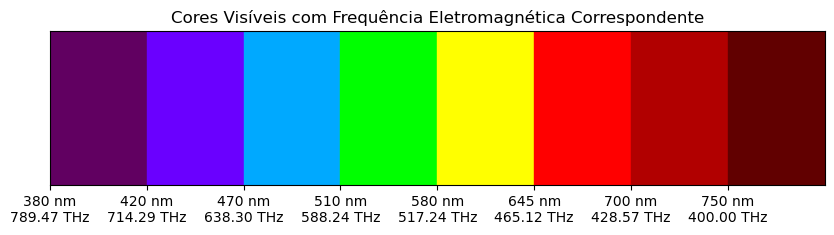

In [67]:
import matplotlib.pyplot as plt

def wavelength_to_rgb(wavelength_nm):
    gamma = 0.8
    intensity_max = 255

    if wavelength_nm < 380 or wavelength_nm > 750:
        return (0, 0, 0)

    if wavelength_nm >= 380 and wavelength_nm < 440:
        R = -(wavelength_nm - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength_nm >= 440 and wavelength_nm < 490:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif wavelength_nm >= 490 and wavelength_nm < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength_nm - 510) / (510 - 490)
    elif wavelength_nm >= 510 and wavelength_nm < 580:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength_nm >= 580 and wavelength_nm < 645:
        R = 1.0
        G = -(wavelength_nm - 645) / (645 - 580)
        B = 0.0
    elif wavelength_nm >= 645 and wavelength_nm <= 750:
        R = 1.0
        G = 0.0
        B = 0.0

    # Atenuação
    if wavelength_nm >= 380 and wavelength_nm < 420:
        factor = 0.3 + 0.7 * (wavelength_nm - 380) / (420 - 380)
    elif wavelength_nm >= 645 and wavelength_nm <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength_nm) / (750 - 645)
    else:
        factor = 1.0

    R = round(intensity_max * (R * factor) ** gamma)
    G = round(intensity_max * (G * factor) ** gamma)
    B = round(intensity_max * (B * factor) ** gamma)

    return (R, G, B)

def wavelength_to_frequency_thz(wavelength_nm):
    c = 3e8  # m/s
    wavelength_m = wavelength_nm * 1e-9  # nm to m
    frequency_hz = c / wavelength_m
    return frequency_hz / 1e12  # return in THz

# Faixa visível aproximada
comprimentos_nm = [380, 420, 470, 510, 580, 645, 700, 750]
cores = [wavelength_to_rgb(w) for w in comprimentos_nm]
freqs_thz = [wavelength_to_frequency_thz(w) for w in comprimentos_nm]

# Visualização
fig, ax = plt.subplots(figsize=(10, 2))
for i, cor in enumerate(cores):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=[c/255 for c in cor]))

ax.set_xlim(0, len(cores))
ax.set_xticks(range(len(comprimentos_nm)))
ax.set_xticklabels([
    f"{comprimentos_nm[i]} nm\n{freqs_thz[i]:.2f} THz"
    for i in range(len(comprimentos_nm))
])
ax.set_yticks([])
plt.title("Cores Visíveis com Frequência Eletromagnética Correspondente")
plt.show()


(177, 0, 0)